In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
def read_txt(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    lines = [x.strip() for x in lines]

    return lines


def get_pixels(mask, name):
    pixels = mask[np.any(mask != [0, 0, 0], axis=-1)]
    unique_pixels = np.unique(pixels, axis=0)
    print(len(unique_pixels))

    with open(f"./{name}.txt", "w") as f:
        for pixel in unique_pixels:
            f.write(f"{pixel}\n")

In [3]:
def find_min_max_rgb_values(mask):
    b_channel, g_channel, r_channel = cv2.split(mask)

    r_min, r_max = r_channel.min(), r_channel.max()
    g_min, g_max = g_channel.min(), g_channel.max()
    b_min, b_max = b_channel.min(), b_channel.max()

    return [r_min, r_max], [g_min, g_max], [b_min, b_max]


def encode_mask(mask, split=None, threshold=50):
    label_transformed = np.zeros(shape=mask.shape, dtype=np.uint8)

    if split == "red":
        red_mask = mask[:, :, 0] >= threshold
        label_transformed[red_mask] = [255, 0, 0] ## 1

    elif split == "green":
        green_mask = mask[:, :, 1] >= threshold
        label_transformed[green_mask] = [0, 255, 0] ## 2

    elif split == "rng":
        red_mask = mask[:, :, 0] >= threshold
        label_transformed[red_mask] = [255, 0, 0] ## 1
        green_mask = mask[:, :, 1] >= threshold
        label_transformed[green_mask] = [0, 255, 0] ## 2

    return label_transformed

In [4]:
data_dir = "/home/pervinco/Datasets/BKAI_IGH_NeoPolyp"
red_txt = f"{data_dir}/red.txt"
green_txt = f"{data_dir}/green.txt"
rng_txt = f"{data_dir}/rng.txt"

red_files = read_txt(red_txt)
green_files = read_txt(green_txt)
rng_files = read_txt(rng_txt)

print(len(red_files), len(green_files), len(rng_files))

694 257 49


In [5]:
file = green_files[0]
img_file = f"{data_dir}/train/{file}.jpeg"
mask_file = f"{data_dir}/train_gt/{file}.jpeg"

image = cv2.imread(img_file)
mask = cv2.imread(mask_file)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

In [6]:
get_pixels(mask, "green")

1734


In [7]:
red_filter, green_filter, blue_filter = find_min_max_rgb_values(mask)
print(red_filter, green_filter, blue_filter)

[0, 93] [0, 255] [0, 94]


1


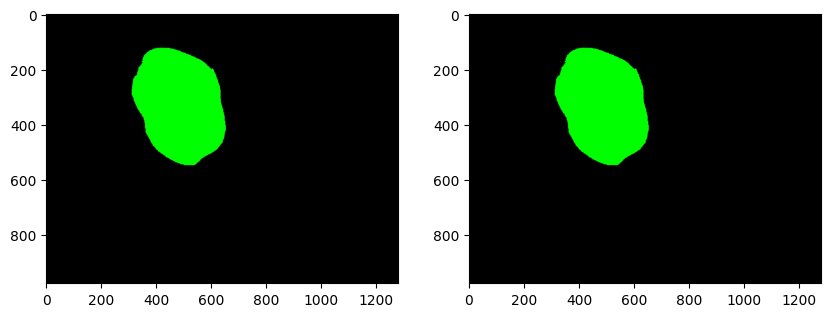

In [8]:
encoded_mask = encode_mask(mask, "green", 50)
get_pixels(encoded_mask, "encoded_green")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(mask)

plt.subplot(1, 2, 2)
plt.imshow(encoded_mask)

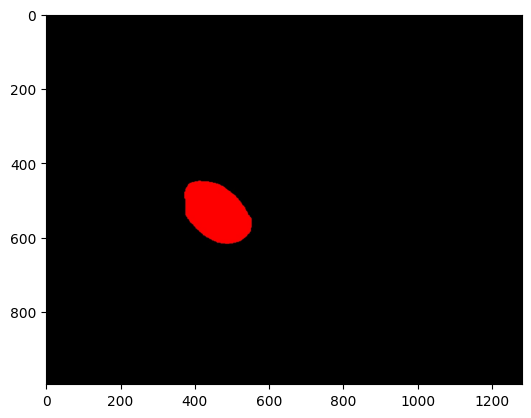

In [11]:
test = cv2.imread(f"{data_dir}/train_mask/0a22abd004c33abf3ae2136cd9dd77ae.jpeg")
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

plt.imshow(test)